In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster,linkage, dendrogram
from sklearn.feature_selection import SelectFromModel
!pip install prettytable
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set graph style and font
sns.set()
# Change the axes' title and label size to 18 & 16 by default and default figure size, and make title bold
# Axes formatter limit will only display scientific notation if it's > 10^7 or < 10^-5
plt.rcParams.update({'axes.titleweight': 'bold','figure.figsize': (8,8),'axes.titlesize': 18,'axes.labelsize': 16,
                     'legend.fontsize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'font.family': 'serif',
                     'axes.formatter.limits':'-5, 7'})

In [3]:
current_path = os.getcwd()
shops = pd.read_csv('coffee_shops.csv')
shops.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True


In [4]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            122 non-null    object 
 6   Delivery option  129 non-null    object 
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


In [5]:
shops.describe(include = 'all')

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
count,200,200,200,198.000000,198.000000,122,129,140,144
unique,10,187,14,NaN,NaN,3,2,1,1
top,Mariupol,Dim Kavy,Coffee shop,NaN,NaN,$$,False,True,True
freq,20,4,97,NaN,NaN,116,94,140,144
mean,NaN,NaN,NaN,4.663636,622.494949,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.221648,1400.898666,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3.900000,3.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.600000,47.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.700000,271.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.800000,786.250000,NaN,NaN,NaN,NaN


In [6]:
# See the missing data
shops.isna().sum()

,0
Region,0
Place name,0
Place type,0
Rating,2
Reviews,2
Price,78
Delivery option,71
Dine in option,60
Takeout option,56


In [7]:
shops.dropna(axis = 0, subset = ['Rating','Reviews'], inplace = True)

In [8]:
shops[['Dine in option', 'Takeout option']] = shops[['Dine in option', 'Takeout option']].fillna(0, axis = 0)
shops['Delivery option'] = shops['Delivery option'].fillna(2, axis = 0)
shops.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,2,0,0
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,0,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,2,0,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,2,True,True


In [9]:
shops[['Delivery option', 'Dine in option', 'Takeout option']].replace({'True': True,'False':False})
shops[['Delivery option', 'Dine in option', 'Takeout option']] = shops[['Delivery option', 'Dine in option', 'Takeout option']] * 1
shops.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,2,0,0
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,0,0,1
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,2,0,1
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,0,1,1
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,2,1,1


In [10]:
# See which types of places there are
shops['Place type'].unique()

array(['Coffee store', 'Cafe', 'Coffee shop', 'Espresso bar',
       'Chocolate shop', 'European restaurant', 'Internet shop',
       'Appliance repair service', 'Store', 'Coffee stand',
       'Coffee roasters', 'Pastry shop', 'E-commerce service',
       'Restaurant'], dtype=object)

In [11]:
# Get indexes for which column Place type has value 'Appliance repair service'
indices = shops[shops['Place type'] == 'Appliance repair service'].index
# Delete these row indexes from shops
shops.drop(indices, inplace=True)
shops.shape

(197, 9)

In [12]:
# Check the current price points distribution
shops['Price'].value_counts()

,count
Price,
$$,116
$$$,4
$,2


In [13]:
print('Upscale shops are:\n', shops[shops['Price'] == '$$$'])
print('\n Affordable shops are:\n', shops[shops['Price'] == '$'])

Upscale shops are:
           Region                    Place name   Place type  Rating  Reviews  \
26       Poltava                        KOFEiN         Cafe     4.4    860.0   
130  Khrivoy Rog                   ЕТУАЛЬ КАФЕ         Cafe     4.6    327.0   
180       Dnipro  DoubleDecker Cake and Coffee  Pastry shop     4.7   2381.0   
195       Dnipro                        Artist   Restaurant     4.6    963.0   

    Price Delivery option Dine in option Takeout option  
26    $$$               2              1              1  
130   $$$               1              1              1  
180   $$$               1              1              1  
195   $$$               2              1              1  

 Affordable shops are:
        Region             Place name    Place type  Rating  Reviews Price  \
13   Mariupol  Кафе на Георгіївській          Cafe     4.5    806.0     $   
158      Kiev          Espressoholic  Espresso bar     4.6   1300.0     $   

    Delivery option Dine in opti

In [14]:
shops.isna().sum()

,0
Region,0
Place name,0
Place type,0
Rating,0
Reviews,0
Price,75
Delivery option,0
Dine in option,0
Takeout option,0


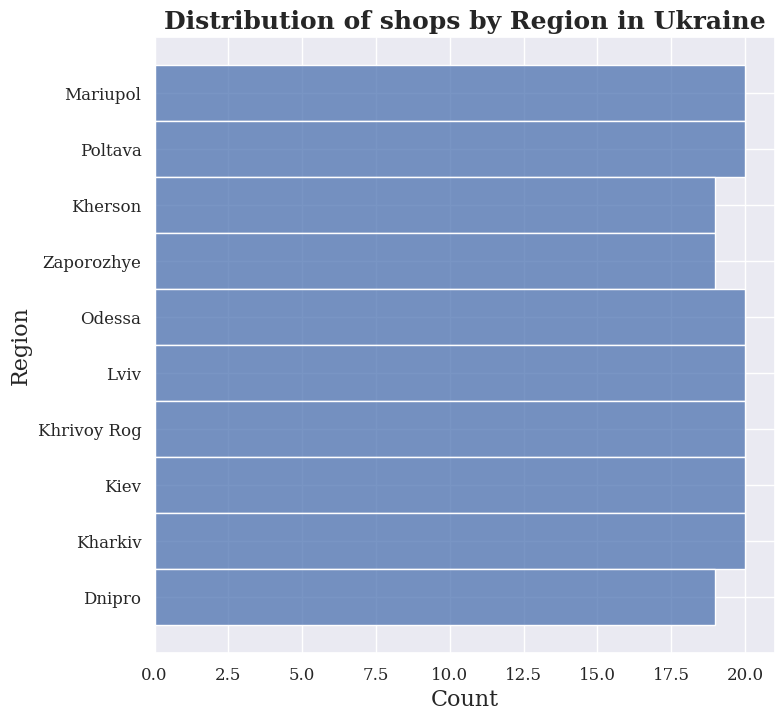

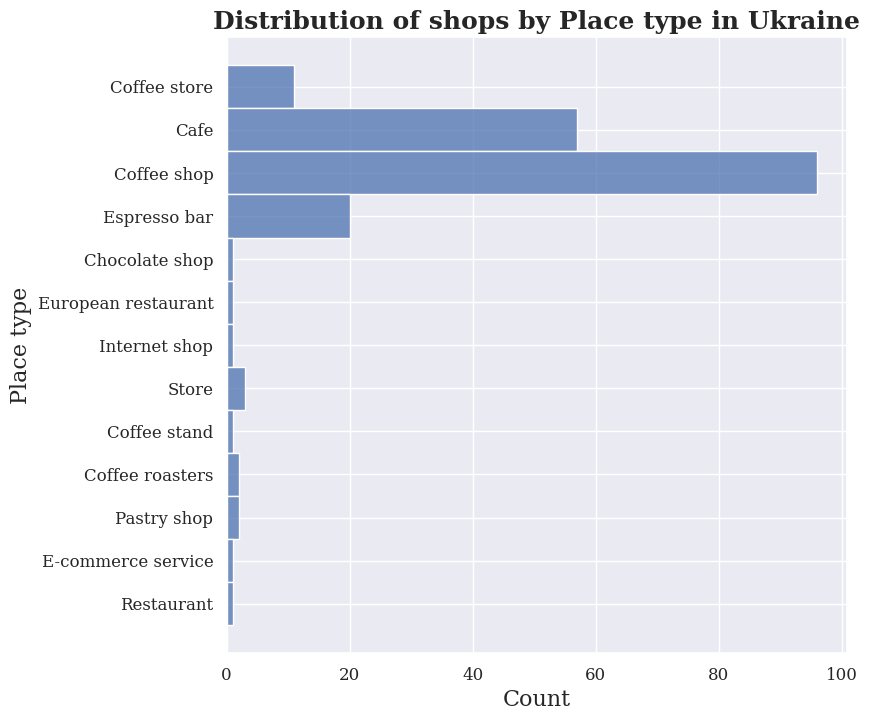

In [15]:
numeric_columns = ['Rating','Reviews', 'Delivery option', 'Dine in option', 'Takeout option']
non_numeric_columns = ['Region', 'Place type']
for column in non_numeric_columns:
    sns.histplot(data = shops, y = column)
    plt.title('Distribution of shops by ' + str(column) + ' in Ukraine')
    plt.show()

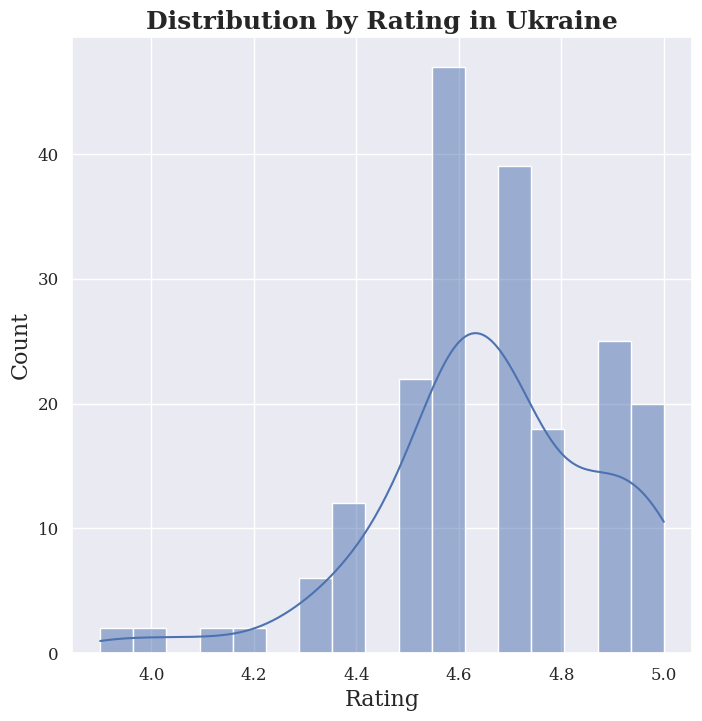

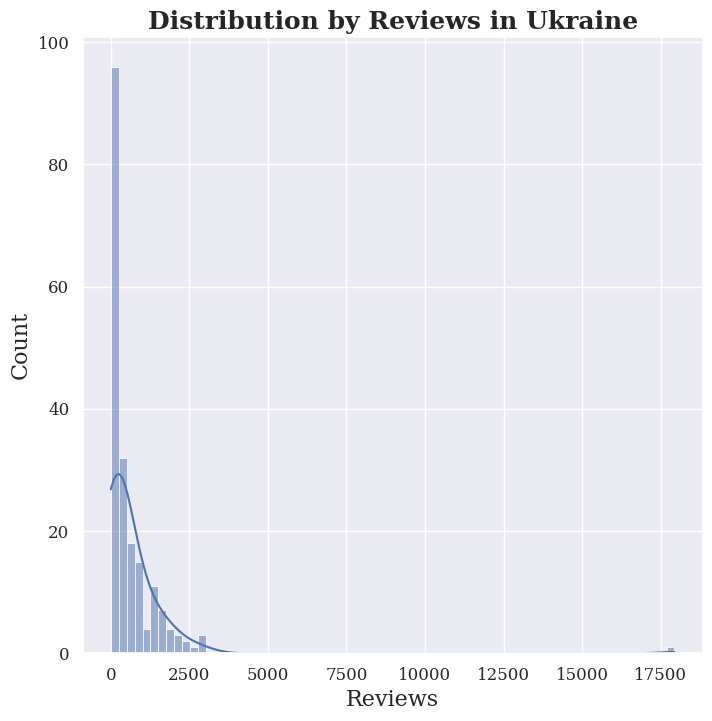

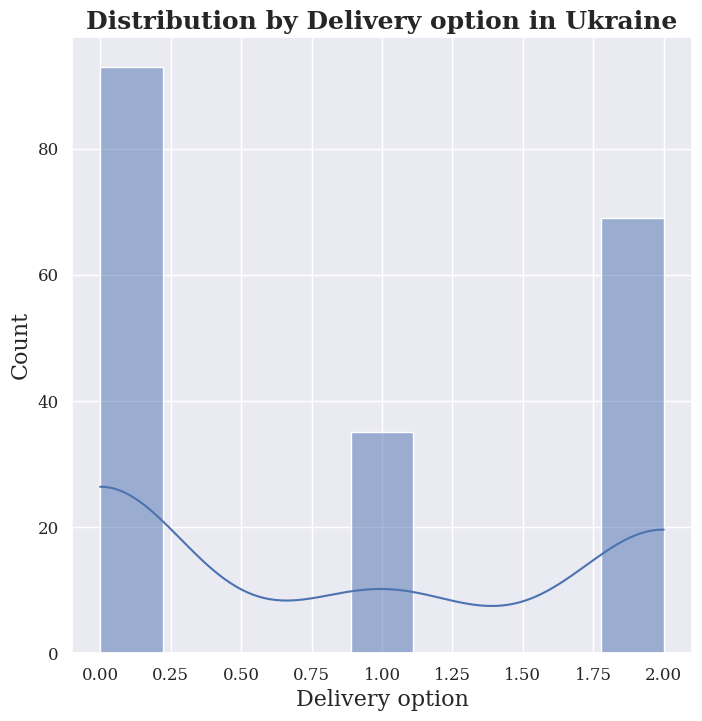

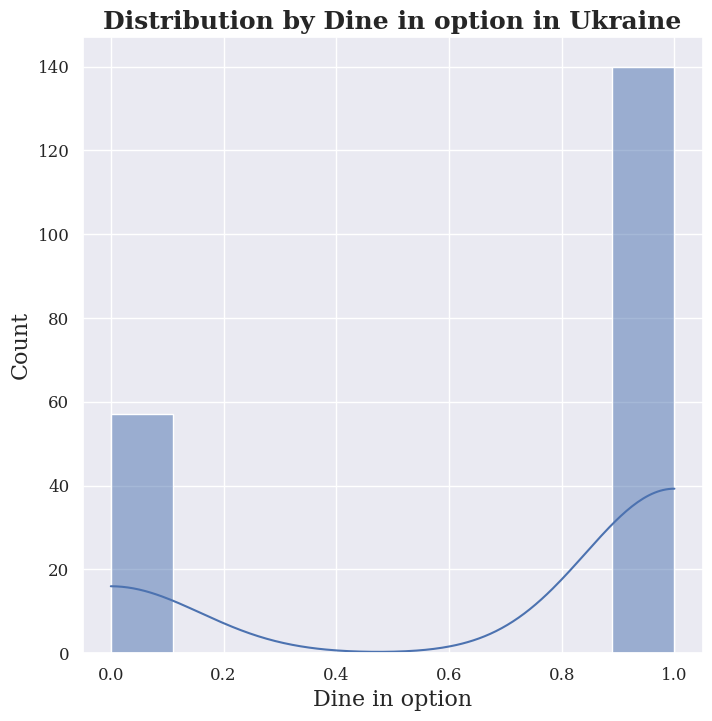

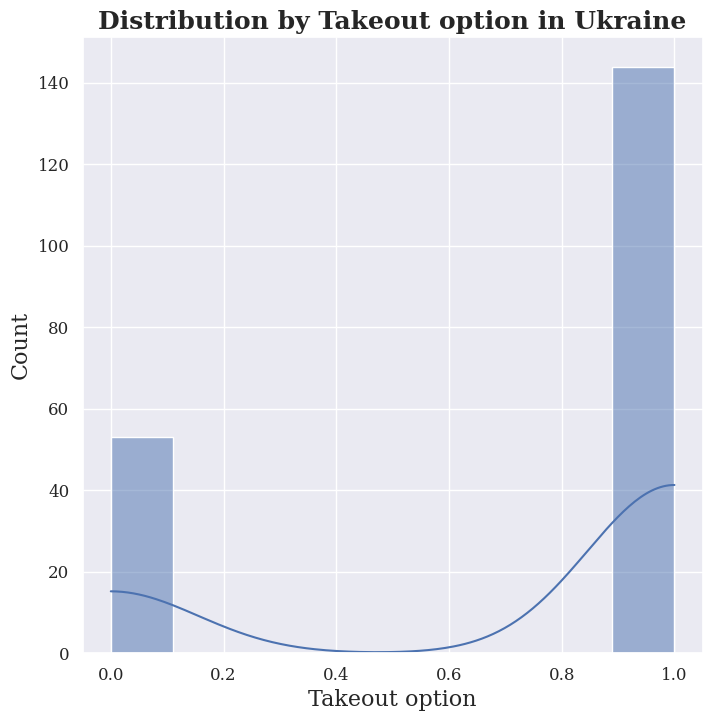

In [16]:
# We'll see the variables in the numeric columns
for column in numeric_columns:
    sns.histplot(shops[column], kde = True)
    plt.title('Distribution by ' + str(column) + ' in Ukraine')
    plt.show()

In [17]:
print('The average shop rating is', shops['Rating'].mean())
print('The average number of reviews a shop has is', shops['Reviews'].mean())

The average shop rating is 4.661928934010152
The average number of reviews a shop has is 625.5786802030457


In [18]:
# See the outlier
# times 3 below because the empirical rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean.
high_review = shops['Reviews'].mean() + shops['Reviews'].std()*3
shops[shops['Reviews'] > high_review]

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
100,Lviv,Lviv Coffee Manufacture,Coffee shop,4.7,17937.0,$$,1,1,1


In [19]:
# We'll just drop the outlier by the index
shops = shops.drop(100, axis = 0)
# Reset index after dropping
shops = shops.reset_index(drop=True)
shops.shape

(196, 9)

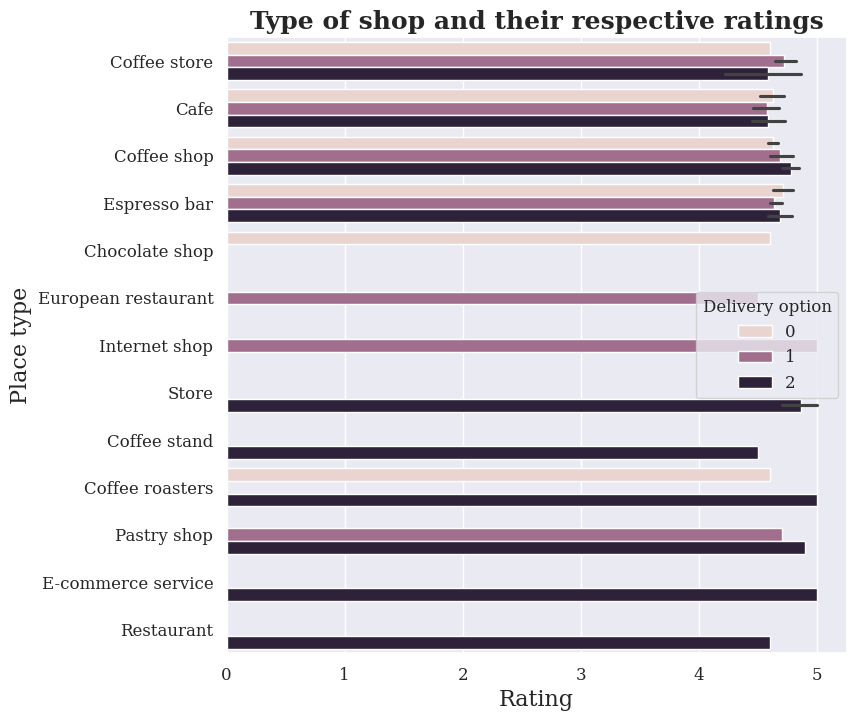

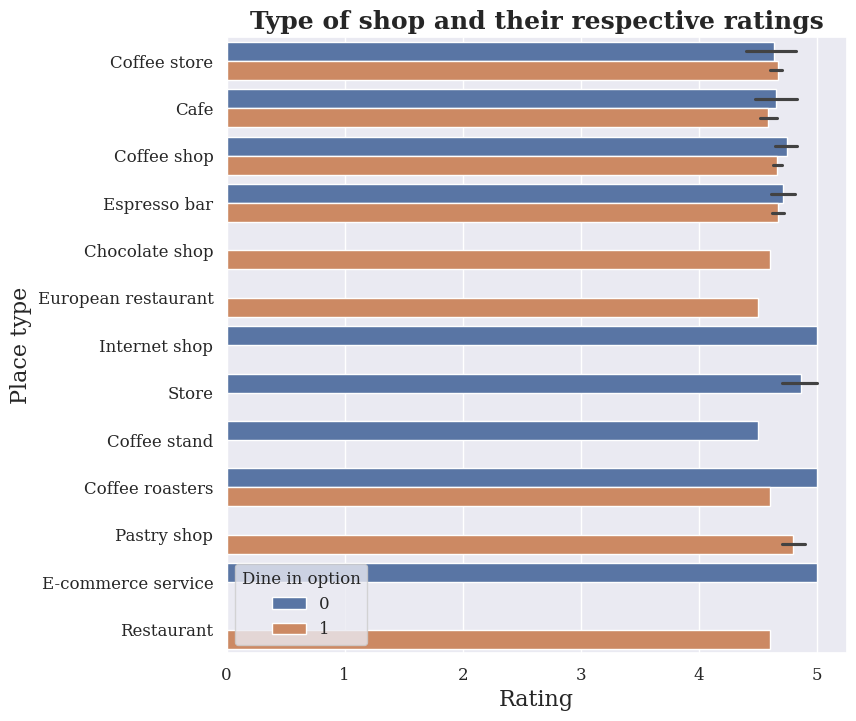

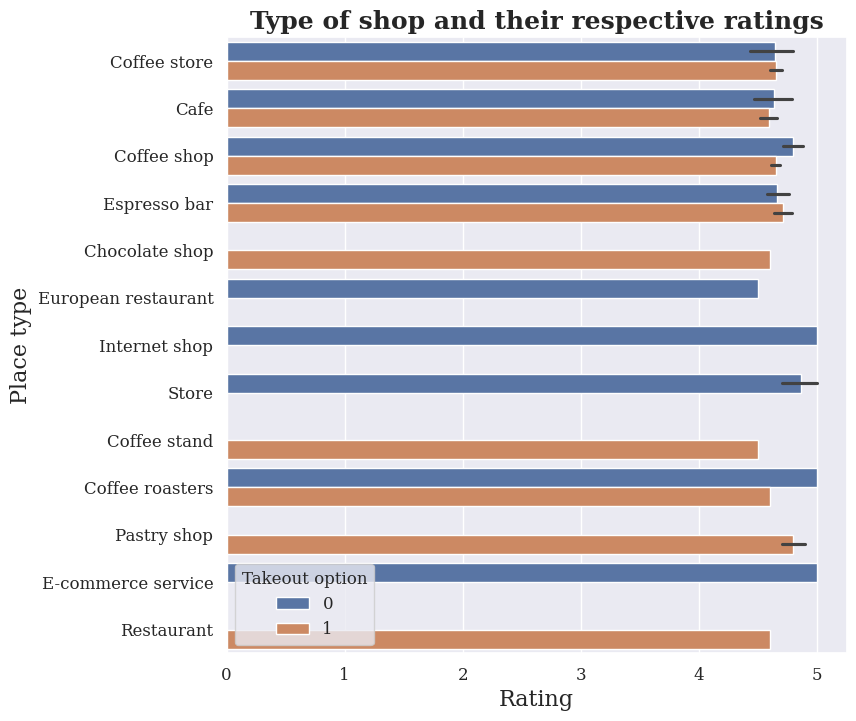

In [20]:
option_columns = ['Delivery option', 'Dine in option', 'Takeout option']
# Types of shops and the ratings
for column in option_columns:
    sns.barplot(x = 'Rating', y = 'Place type', hue = column, data = shops)
    plt.title('Type of shop and their respective ratings')
    plt.show()

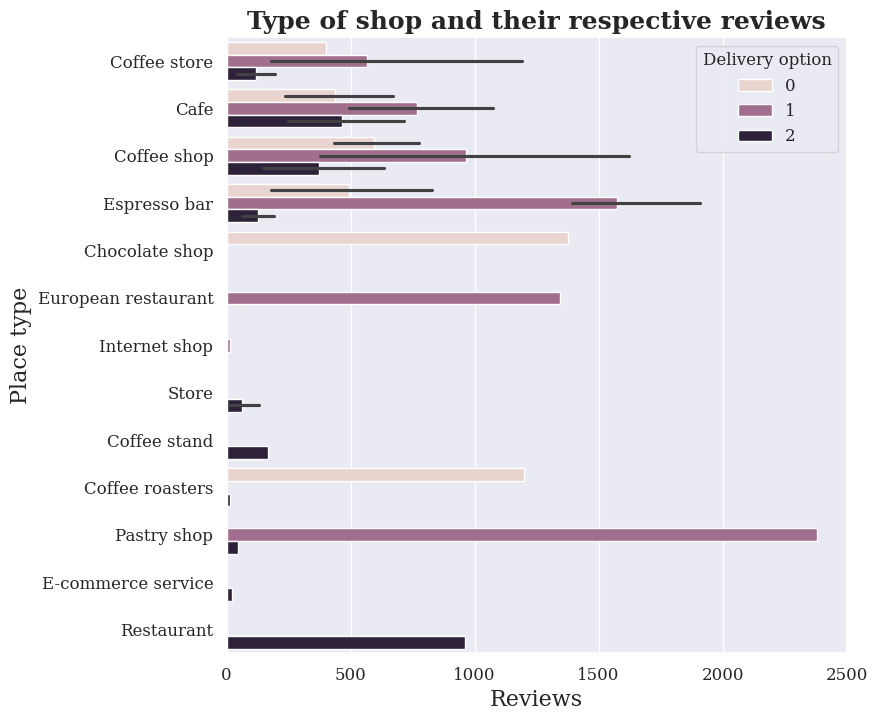

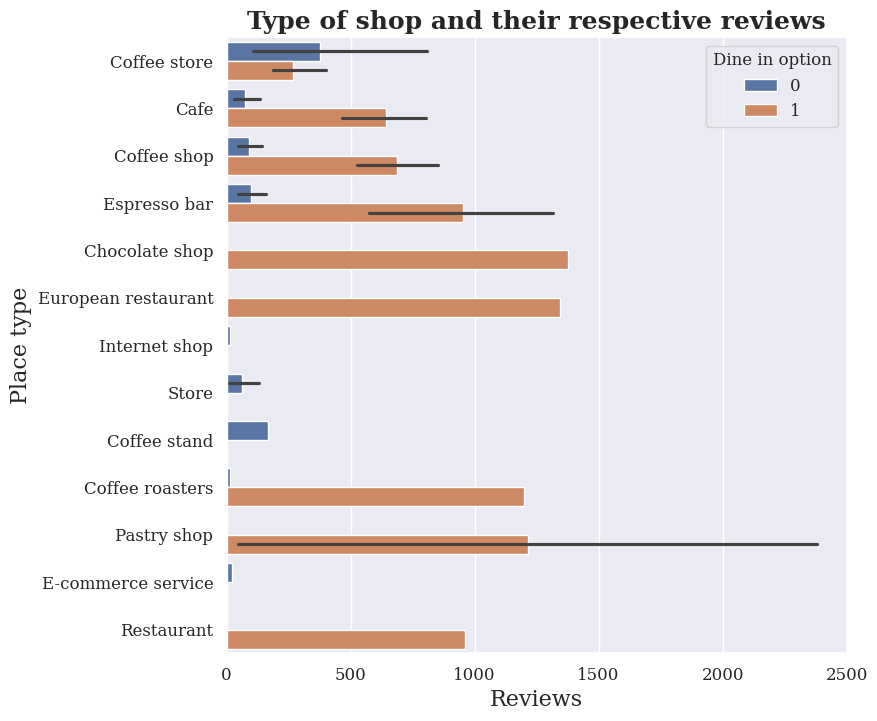

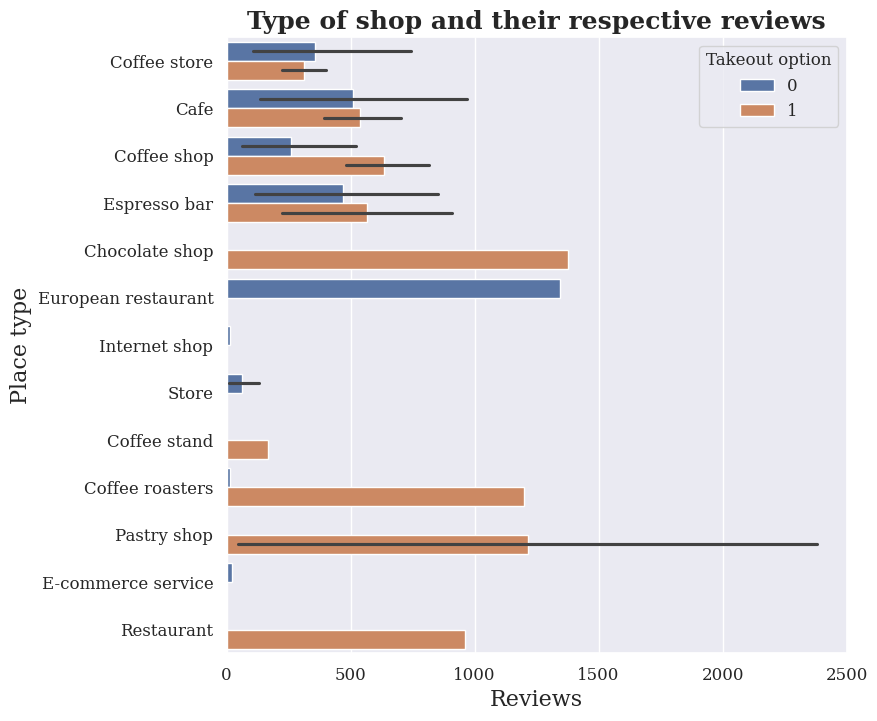

In [21]:
# Types of shops and the number of reviews
for column in option_columns:
    sns.barplot(x = 'Reviews', y = 'Place type', hue = column, data = shops)
    plt.title('Type of shop and their respective reviews')
    plt.show()

In [22]:
# We'll group by the main numeric columns: Rating and Reviews
regions = shops.groupby('Region')[numeric_columns].mean().round(2)
regions

,Rating,Reviews,Delivery option,Dine in option,Takeout option
Region,,,,,
Dnipro,4.55,589.95,1.157895,0.894737,0.789474
Kharkiv,4.58,544.45,0.9,0.7,0.65
Kherson,4.64,370.16,0.473684,0.631579,0.894737
Khrivoy Rog,4.60,461.90,0.75,0.8,0.85
Kiev,4.78,764.60,1.15,0.6,0.55
Lviv,4.67,1096.63,0.526316,0.947368,1.0
Mariupol,4.70,193.80,1.0,0.7,0.95
Odessa,4.78,422.00,1.3,0.65,0.45
Poltava,4.65,535.25,0.5,0.6,0.65


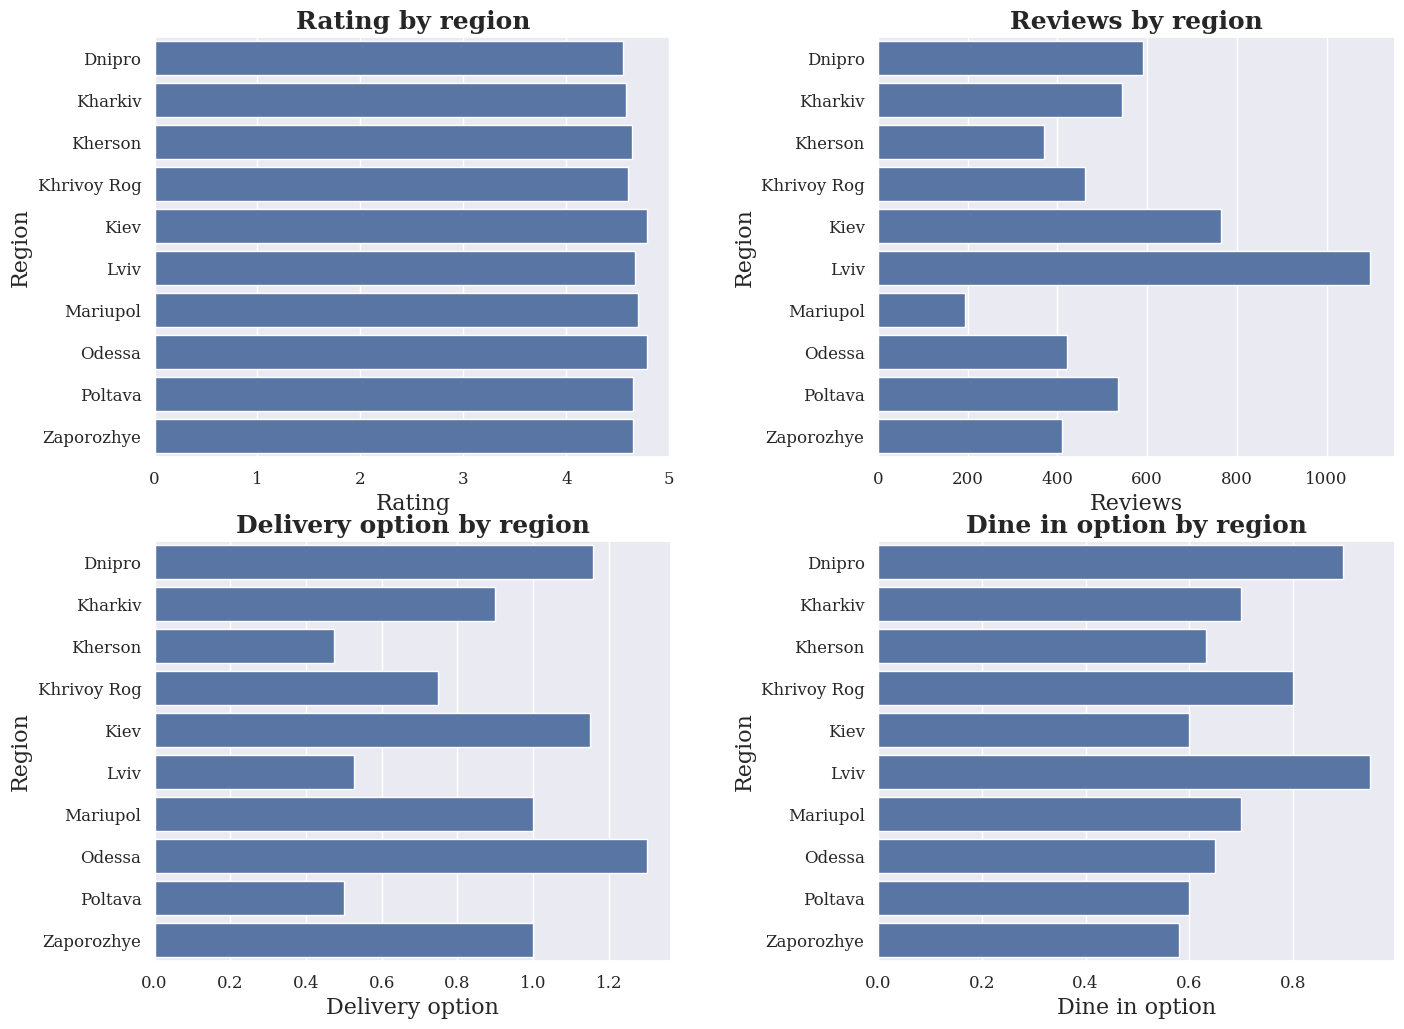

In [23]:
# Put the numbers above into graphs
plt.figure(figsize = (16,12))
plt.subplots_adjust(wspace = 0.4)
for i, column in enumerate(regions.columns.to_list()[:4]):
    plt.subplot(2, 2, i+1)
    sns.barplot(x = regions[column], y = regions.index)
    plt.title(column + ' by region')
plt.show()

In [24]:
# Create a new dataset composed of just rating and reviews for clustering
X = shops[['Rating', 'Reviews']]
X

,Rating,Reviews
0,4.6,206.0
1,5.0,24.0
2,5.0,11.0
3,4.4,331.0
4,5.0,12.0
...,...,...
191,4.6,963.0
192,4.3,646.0
193,4.6,16.0
194,4.7,599.0


In [25]:
# We will scale the data for the rating and review columns since they're quite skewed as we saw in the graphs
scaler = StandardScaler()
X[['Scaled rating', 'Scaled reviews']] = scaler.fit_transform(X)
print(X)

     Rating  Reviews  Scaled rating  Scaled reviews
0       4.6    206.0      -0.279486       -0.502925
1       5.0     24.0       1.531398       -0.779244
2       5.0     11.0       1.531398       -0.798981
3       4.4    331.0      -1.184928       -0.313145
4       5.0     12.0       1.531398       -0.797463
..      ...      ...            ...             ...
191     4.6    963.0      -0.279486        0.646383
192     4.3    646.0      -1.637649        0.165101
193     4.6     16.0      -0.279486       -0.791390
194     4.7    599.0       0.173235        0.093744
195     4.3    341.0      -1.637649       -0.297962

[196 rows x 4 columns]


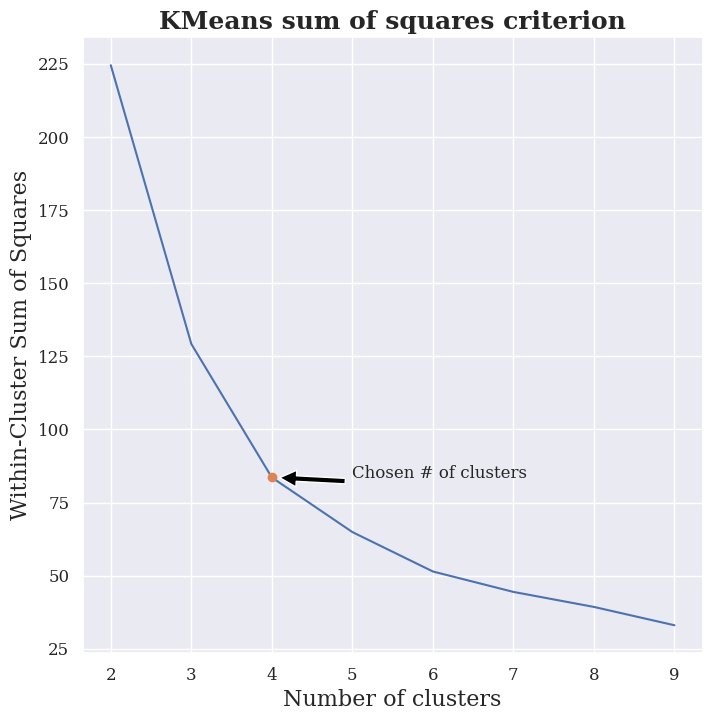

In [26]:
# To keep track of the within-cluster sum of squares
scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X[['Scaled rating', 'Scaled reviews']])
    scores.append(kmeans.inertia_)

# Plot Within-Cluster Sum of Squares distance
fig, ax = plt.subplots()
plt.plot(np.arange(2,10), scores)
plt.title('KMeans sum of squares criterion')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
ax.annotate('Chosen # of clusters', xy=(4.05, 83.58), xytext=(5, 83.58),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.plot(4, 83.58, 'o')  # Plot a small dot inside the graph
plt.show()

In [27]:
# Get the labels for 4 clusters
np.random.seed(2) # To ensure replicability
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
group_labels = kmeans.labels_

In [28]:
# Append the group labels into the original data
clustered_shops = shops.assign(Cluster = group_labels)
print(clustered_shops.head())

# See how many shops are in each cluster
print('Number of shops in each cluster is:\n', clustered_shops.groupby('Cluster')['Region'].count())

# Group clusters by rating and reviews
clustered_shops.groupby('Cluster')[['Rating', 'Reviews']].mean().round(2)

     Region             Place name    Place type  Rating  Reviews Price  \
0  Mariupol               Dim Kavu  Coffee store     4.6    206.0   NaN   
1  Mariupol                Коферум          Cafe     5.0     24.0    $$   
2  Mariupol       Кофейня Світ Чаю   Coffee shop     5.0     11.0   NaN   
3  Mariupol       Кофейня Starcoff   Coffee shop     4.4    331.0    $$   
4  Mariupol  Кофейня "Friend Zone"   Coffee shop     5.0     12.0   NaN   

  Delivery option Dine in option Takeout option  Cluster  
0               2              0              0        2  
1               0              0              1        2  
2               2              0              1        2  
3               0              1              1        2  
4               2              1              1        2  
Number of shops in each cluster is:
 Cluster
0     40
1     24
2    122
3     10
Name: Region, dtype: int64


,Rating,Reviews
Cluster,,
0,4.58,706.80
1,4.56,1497.04
2,4.71,135.28
3,4.64,2459.70


In [29]:
# Upscale shops
clustered_shops[clustered_shops['Price'] == '$$$']

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,Cluster
26,Poltava,KOFEiN,Cafe,4.4,860.0,$$$,2,1,1,0
127,Khrivoy Rog,ЕТУАЛЬ КАФЕ,Cafe,4.6,327.0,$$$,1,1,1,2
177,Dnipro,DoubleDecker Cake and Coffee,Pastry shop,4.7,2381.0,$$$,1,1,1,3
191,Dnipro,Artist,Restaurant,4.6,963.0,$$$,2,1,1,0


In [30]:
# Affordable shops
clustered_shops[clustered_shops['Price'] == '$']

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,Cluster
13,Mariupol,Кафе на Георгіївській,Cafe,4.5,806.0,$,2,1,1,0
155,Kiev,Espressoholic,Espresso bar,4.6,1300.0,$,0,1,1,1


In [31]:
cluster_0 = clustered_shops[clustered_shops['Cluster'] == 0]
cluster_0

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,Cluster
13,Mariupol,Кафе на Георгіївській,Cafe,4.5,806.0,$,2,1,1,0
14,Mariupol,Khosper,Cafe,4.2,609.0,$$,2,1,1,0
22,Poltava,Buns Brew Bar,Coffee shop,4.7,459.0,$$,0,0,1,0
25,Poltava,Your Coffee,Cafe,4.7,569.0,$$,0,1,0,0
26,Poltava,KOFEiN,Cafe,4.4,860.0,$$$,2,1,1,0
28,Poltava,Misceva kavyarnya,Coffee shop,4.5,898.0,$$,0,1,1,0
37,Poltava,Koffishka,Coffee shop,4.1,716.0,$$,0,1,1,0
41,Kherson,Godshot Coffee,Cafe,4.7,726.0,$$,2,1,1,0
44,Kherson,I love coffee,Coffee shop,4.7,485.0,$$,0,1,1,0
49,Kherson,Prostir.coffee,Coffee shop,4.7,587.0,$$,1,1,1,0


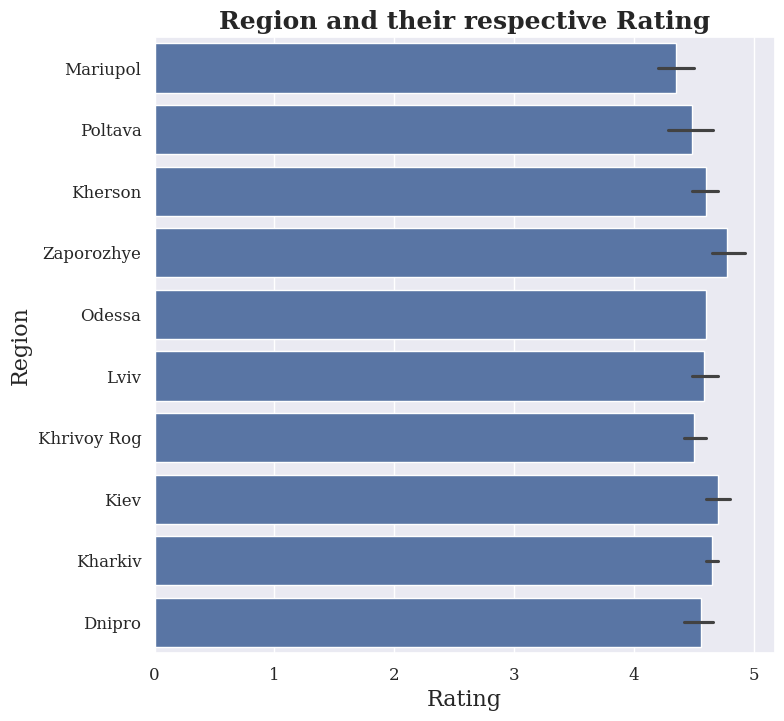

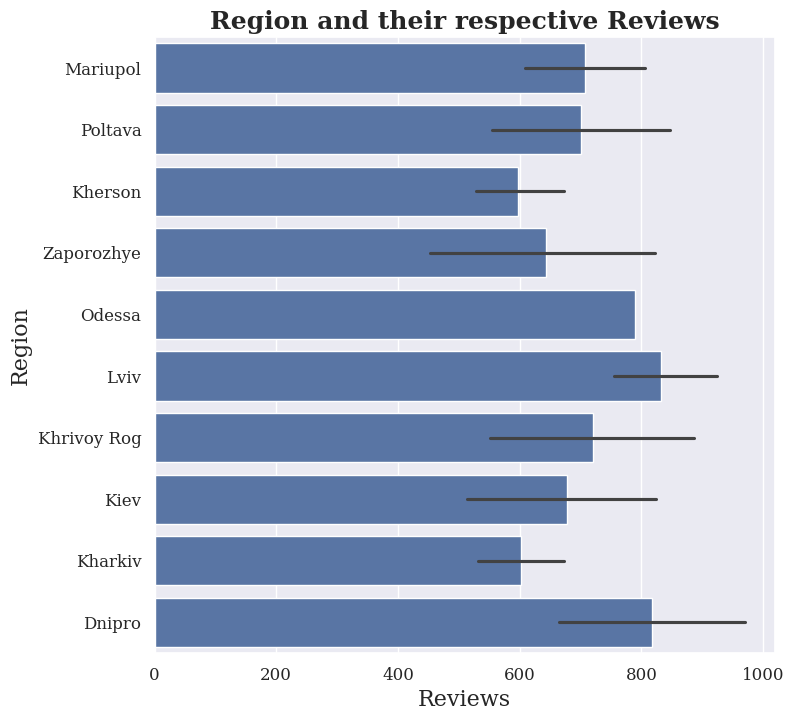

In [32]:
metric_columns = ['Rating', 'Reviews']
# Ratings and reviews by region
for column in metric_columns:
    sns.barplot(y = 'Region', x = column, data = cluster_0)
    plt.title('Region and their respective ' + column)
    plt.show()

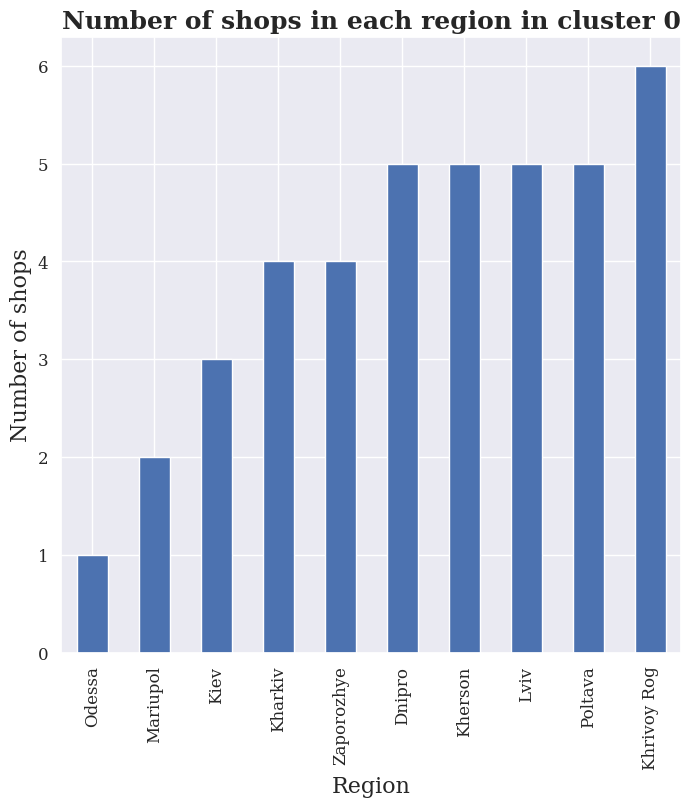

In [33]:
cluster_0.groupby('Region')['Rating'].count().sort_values().plot(kind = 'bar')
plt.ylabel('Number of shops')
plt.xlabel('Region')
plt.title('Number of shops in each region in cluster 0')
plt.show()

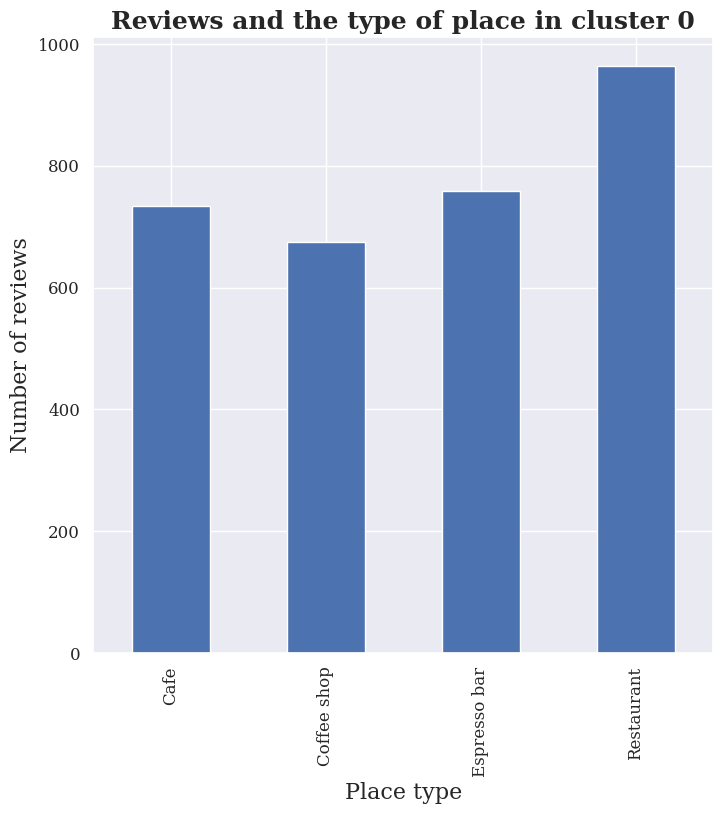

In [34]:
cluster_0.groupby('Place type')['Reviews'].mean().plot(kind = 'bar')
plt.ylabel('Number of reviews')
plt.xlabel('Place type')
plt.title('Reviews and the type of place in cluster 0')
plt.show()

In [35]:
# Get this number in cluser 0
dinein = cluster_0['Dine in option'] == True
takeout = cluster_0['Takeout option'] == True

two_services_0 = cluster_0[dinein & takeout]
proportion_0 = len(two_services_0) / len(cluster_0)

In [36]:
cluster_1 = clustered_shops[clustered_shops['Cluster'] == 1]
cluster_2 = clustered_shops[clustered_shops['Cluster'] == 2]
cluster_3 = clustered_shops[clustered_shops['Cluster'] == 3]

In [37]:
# Get this number in cluser 1
dinein = cluster_1['Dine in option'] == True
takeout = cluster_1['Takeout option'] == True

two_services_1 = cluster_1[dinein & takeout]
proportion_1 = len(two_services_1) / len(cluster_1)

In [38]:
# Get this number in cluser 2
dinein = cluster_2['Dine in option'] == True
takeout = cluster_2['Takeout option'] == True

two_services_2 = cluster_2[dinein & takeout]
proportion_2 = len(two_services_2) / len(cluster_2)

In [39]:
# Get this number in cluser 3
dinein = cluster_3['Dine in option'] == True
takeout = cluster_3['Takeout option'] == True

two_services_3 = cluster_3[dinein & takeout]
proportion_3 = len(two_services_3) / len(cluster_3)

In [40]:
t1 = PrettyTable()
t1.field_names = ["Cluster", "Percentage of shops that offer both dine-in and take-out"]
t1.add_rows([
        ["Cluster 0", '{:.1%}'.format(proportion_0)],
        ["Cluster 1", '{:.1%}'.format(proportion_1)],
        ["Cluster 2", '{:.1%}'.format(proportion_2)],
        ["Cluster 3", '{:.1%}'.format(proportion_3)],
])
print(t1)

+-----------+----------------------------------------------------------+
|  Cluster  | Percentage of shops that offer both dine-in and take-out |
+-----------+----------------------------------------------------------+
| Cluster 0 |                          92.5%                           |
| Cluster 1 |                          66.7%                           |
| Cluster 2 |                          45.9%                           |
| Cluster 3 |                          100.0%                          |
+-----------+----------------------------------------------------------+


In [41]:
delivery_in_0 = cluster_0['Delivery option'] == True
delivery_0 = cluster_0[delivery_in_0]
prop_deliver_0 = len(delivery_0) / len(cluster_0)

delivery_in_1 = cluster_1['Delivery option'] == True
delivery_1 = cluster_1[delivery_in_1]
prop_deliver_1 = len(delivery_1) / len(cluster_1)

delivery_in_2 = cluster_2['Delivery option'] == True
delivery_2 = cluster_2[delivery_in_2]
prop_deliver_2 = len(delivery_2) / len(cluster_2)

delivery_in_3 = cluster_3['Delivery option'] == True
delivery_3 = cluster_3[delivery_in_3]
prop_deliver_3 = len(delivery_3) / len(cluster_3)

In [43]:
t2 = PrettyTable()
t2.field_names = ["Cluster", "Percentage of shops that offer delivery"]
t2.add_rows([
        ["Cluster 0", '{:.1%}'.format(prop_deliver_0)],
        ["Cluster 1", '{:.1%}'.format(prop_deliver_1)],
        ["Cluster 2", '{:.1%}'.format(prop_deliver_2)],
        ["Cluster 3", '{:.1%}'.format(prop_deliver_3)],
])
print(t2)

+-----------+-----------------------------------------+
|  Cluster  | Percentage of shops that offer delivery |
+-----------+-----------------------------------------+
| Cluster 0 |                  15.0%                  |
| Cluster 1 |                  50.0%                  |
| Cluster 2 |                  11.5%                  |
| Cluster 3 |                  20.0%                  |
+-----------+-----------------------------------------+
